In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Facebook advertising campaign statistics
fb_data = pd.read_csv('C:/Users/Pandas/Vizualization data Python/facebook_ads_data (2.0).csv')

In [2]:
fb_data.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [3]:
# 1. Grouping data by day and for grouped data construct two graphs:
# Graph with the daily amount of advertising costs in 2021;
# Graph with daily ROMI in 2021.

# Sorting the data for 2021
fb_data_2021 = fb_data[(fb_data['ad_date']>='2021-01-01') & (fb_data['ad_date']<'2021-12-31')]

In [4]:
# Grouping the data
fb_data_2021_grouped = fb_data_2021.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()

In [5]:
fb_data_2021_grouped.head()

,total_spend,total_impressions,total_clicks,total_value
ad_date,,,,
2021-01-01,0.39,353,0,0.59
2021-01-02,7.74,10709,205,6.90
2021-01-04,70.06,22440,1256,68.47
2021-01-05,81.15,60232,1379,61.68
2021-01-06,142.77,65265,431,145.97


C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


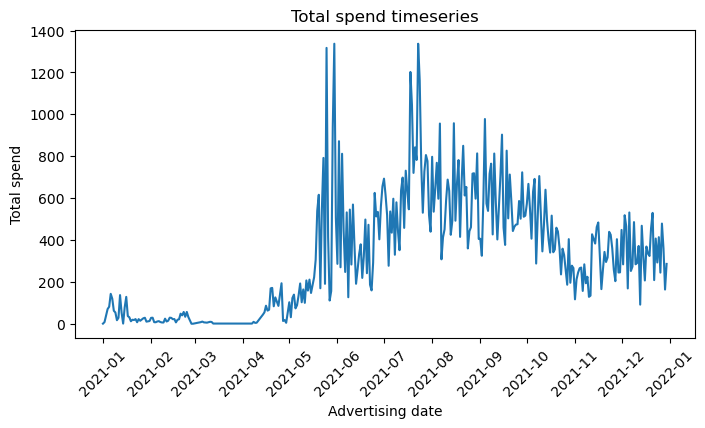

In [6]:
fb_data_2021_grouped = fb_data_2021_grouped.reset_index()

# Convert 'ad_date' to date format
fb_data_2021_grouped['ad_date'] = pd.to_datetime(fb_data_2021_grouped['ad_date'], errors='coerce')

# Plotting graph
plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(x='ad_date', y='total_spend', data=fb_data_2021_grouped)
plt.title('Total spend timeseries')
plt.xlabel('Advertising date')
plt.ylabel('Total spend')

# X-axis formatting settings
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.show()

In [7]:
fb_data_2021_grouped['ROMI'] = fb_data_2021_grouped['total_value'] / fb_data_2021_grouped['total_spend']

C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


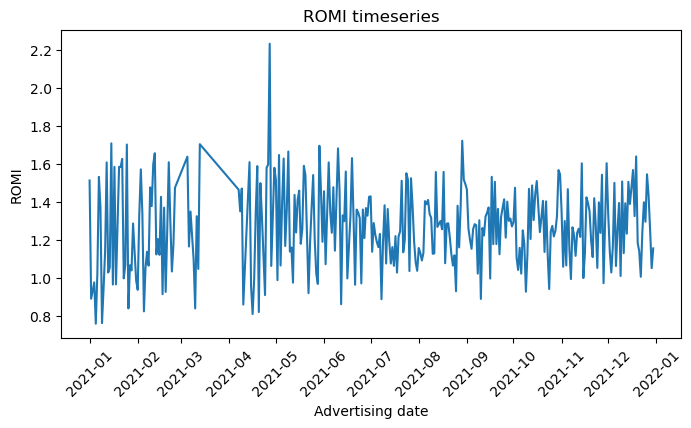

In [8]:
plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(x='ad_date', y='ROMI', data=fb_data_2021_grouped)
plt.title('ROMI timeseries')
plt.xlabel('Advertising date')
plt.ylabel('ROMI')

# X-axis formatting settings
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.show()

In [9]:
# 2. Grouping data by the name of the campaign, build two graphs:
# Graph of the total amount of advertising expenses in each of the campaigns;
# Total ROMI in each of the campaigns.

# Grouping the data by campaign_name
fb_data_2021_grouped_campaign = fb_data_2021.groupby('campaign_name')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()

In [10]:
fb_data_2021_grouped_campaign.head()

,total_spend,total_impressions,total_clicks,total_value
campaign_name,,,,
Brand,421.64,785900,465,518.67
Crazy discounts,2175.29,1401511,19627,2583.59
Discounts,1791.22,840908,21089,2196.60
Electronics,23920.42,7070770,51593,29169.38
Lookalike,63487.90,20994689,220799,80095.84


In [11]:
fb_data_2021_grouped_campaign = fb_data_2021_grouped_campaign.reset_index()

C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


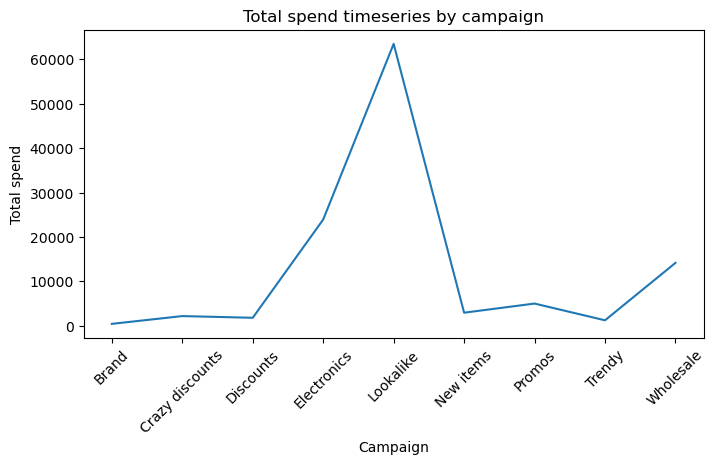

In [12]:
# Plotting graph
plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(x='campaign_name', y='total_spend', data=fb_data_2021_grouped_campaign)
plt.title('Total spend timeseries by campaign')
plt.xlabel('Campaign')
plt.ylabel('Total spend')

plt.xticks(rotation=45)
plt.show()

C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


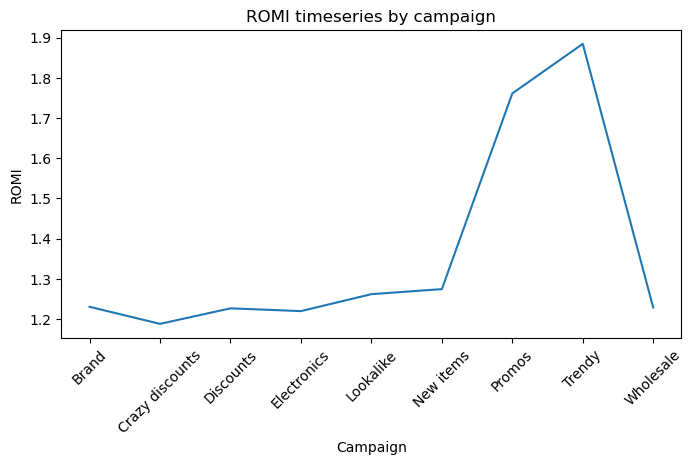

In [13]:
fb_data_2021_grouped_campaign['ROMI'] = fb_data_2021_grouped_campaign['total_value'] / fb_data_2021_grouped_campaign['total_spend']

# Plotting graph ROMI
plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(x='campaign_name', y='ROMI', data=fb_data_2021_grouped_campaign)
plt.title('ROMI timeseries by campaign')
plt.xlabel('Campaign')
plt.ylabel('ROMI')

plt.xticks(rotation=45)
plt.show()

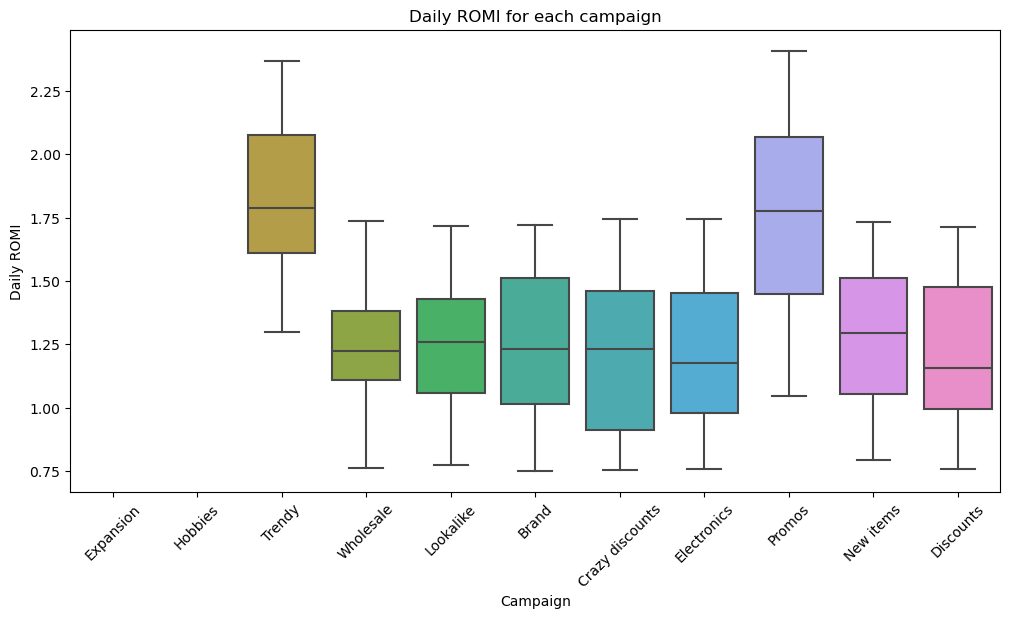

In [14]:
# 3. Distribution of daily ROMI in each campaign (by campaign name.) Box plot.

fb_data['ROMI'] = fb_data['total_value'] / fb_data_2021['total_spend']

# Побудова box plot для кожної кампанії
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='campaign_name', y='ROMI', data=fb_data)
plt.title('Daily ROMI for each campaign')
plt.xlabel('Campaign')
plt.ylabel('Daily ROMI')
plt.xticks(rotation=45)
plt.show()

C:\Users\timof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


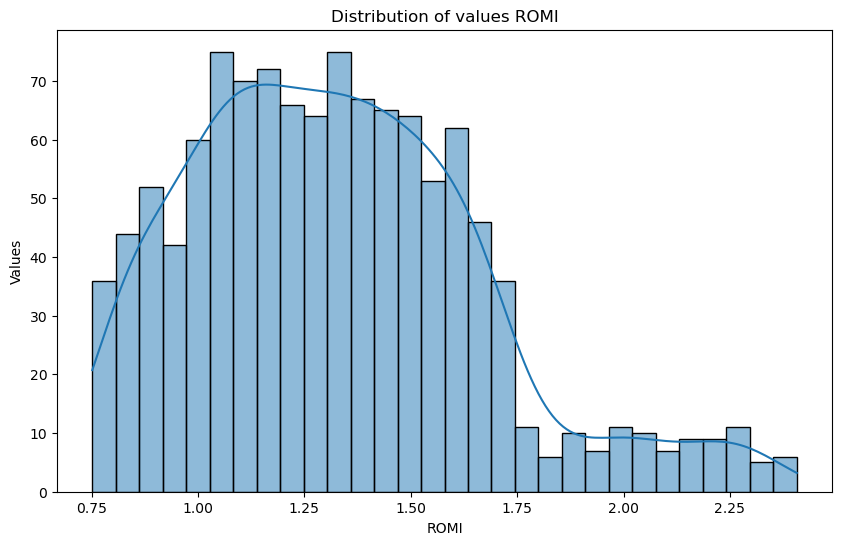

In [15]:
# 4. Histogram with the distribution of ROMI values ​​in the table
plt.figure(figsize = (10,6), dpi = 100)
sns.histplot(fb_data['ROMI'], bins=30, kde=True)
plt.title('Distribution of values ROMI')
plt.xlabel('ROMI')
plt.ylabel('Values')
plt.show()

In [16]:
# 5. Construction of a heatmap of the correlation between all numerical indicators in the facebook_ads_data.csv table.
# Highest and lowest correlation. What does "total_value" correlate to?

fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
 10  ROMI               1151 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 128.5+ KB


In [17]:
# We exclude non-numeric columns
numeric_data = fb_data.select_dtypes(include=[float, int])

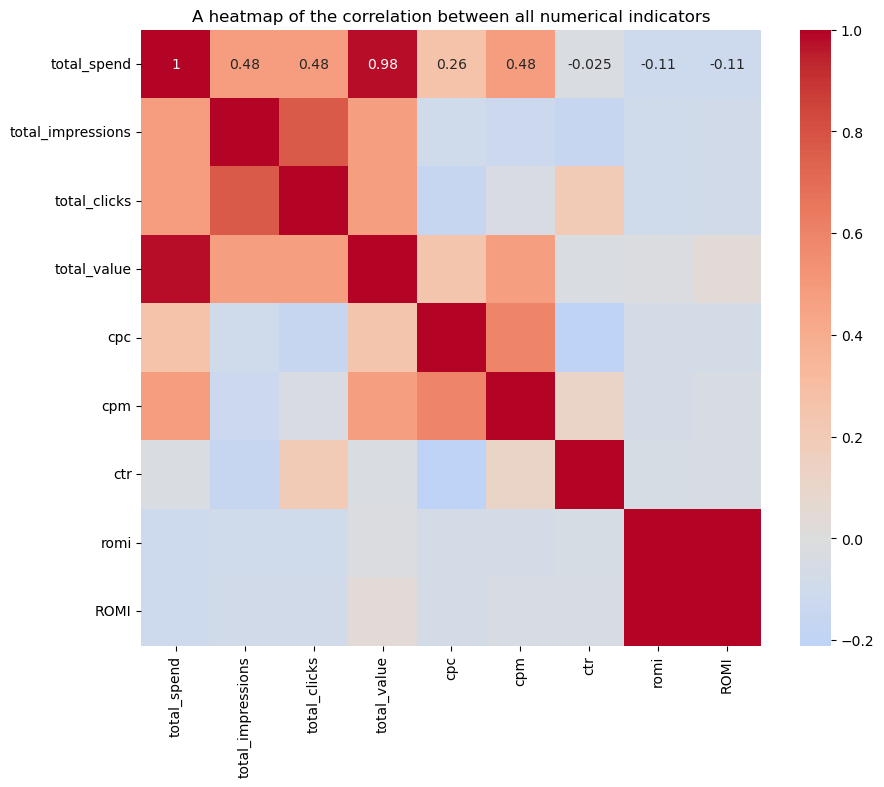

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8), dpi=100)
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('A heatmap of the correlation between all numerical indicators')
plt.show()

In [19]:
# Determination of the highest and lowest correlation.
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort")
highest_correlation = sorted_pairs[-2]  # -1 це кореляція змінної з самою собою
lowest_correlation = sorted_pairs[0]

C:\Users\timof\AppData\Local\Temp\ipykernel_24000\3602526225.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_correlation = sorted_pairs[-2]  # -1 це кореляція змінної з самою собою
C:\Users\timof\AppData\Local\Temp\ipykernel_24000\3602526225.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lowest_correlation = sorted_pairs[0]


In [20]:
print(f"Highest_correlation: {highest_correlation}")
print(f"Lowest_correlation: {lowest_correlation}")
print(f"Correlation total_value with others indicators:\n{correlation_matrix['total_value']}")


Highest_correlation: 1.0
Lowest_correlation: -0.2107190927671994
Correlation total_value with others indicators:
total_spend          0.978890
total_impressions    0.472037
total_clicks         0.472124
total_value          1.000000
cpc                  0.250851
cpm                  0.471338
ctr                 -0.022267
romi                -0.013733
ROMI                 0.032071
Name: total_value, dtype: float64


<Figure size 1000x600 with 0 Axes>

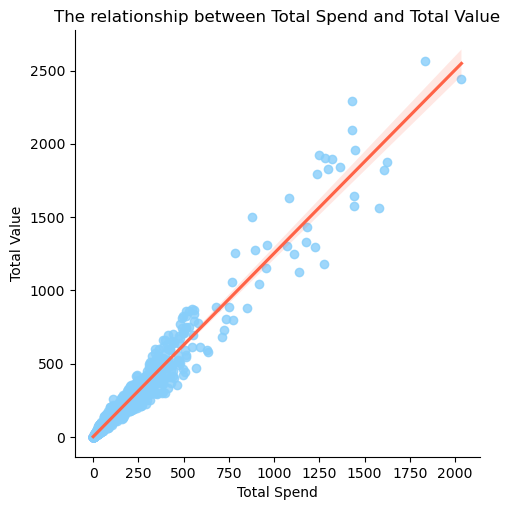

In [21]:
# Завдання 6: The scatterplot with linear regression 
# plotted against data from "total_spend" and "total_value" to visualize the relationship between these values.

plt.figure(figsize=(10, 6), dpi=100)
sns.lmplot(x='total_spend', y='total_value', data=fb_data, scatter_kws={'color': '#87CEFA'}, line_kws={'color': '#FF6347'})
plt.title('The relationship between Total Spend and Total Value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()